In [57]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel

In [58]:
df_train=pd.read_csv('Train.csv',delimiter = ',')

In [81]:
df_train.head()

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.400,...,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,Y,1674.09,20014.0
2,7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.250,...,82.0,10752.0,58373.25,75283.0,7.0,1.0,27036.0,Y,25375.27,16095.0
3,1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.000,...,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,Y,3544.33,7707.0
4,16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.000,...,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,Y,12780.44,96408.0
5,19106,current,M,27,958,2328.22,1597.54,19979.75,1045.85,11686.255,...,2.0,21440.0,52292.68,199925.5,2.0,35.0,17284.0,Y,5026.50,130263.0


In [82]:
df1=df_train.loc[:,df_train.dtypes==np.object]

In [83]:
df2=df_train.loc[:,df_train.dtypes==np.number]
df2.head()

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,24893.00,378.00,10288.00,29664.00,16291.400,11432.00,2.0,26.0,10.0,48.0,...,2.0,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,1674.09,20014.0
2,5678.87,2724.00,1964.50,3933.11,23956.250,5168.00,43.0,32.0,102.0,4.0,...,2.0,82.0,10752.0,58373.25,75283.0,7.0,1.0,27036.0,25375.27,16095.0
3,30489.50,1236.00,12609.88,9138.14,17521.000,13650.30,53.0,1.0,50.0,1.0,...,23.0,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,3544.33,7707.0
4,7441.40,6906.04,4364.00,1939.00,2121.000,6829.18,67.0,47.0,82.0,54.0,...,24.0,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,12780.44,96408.0
5,2328.22,1597.54,19979.75,1045.85,11686.255,628.00,6.0,7.0,59.0,25.0,...,43.0,2.0,21440.0,52292.68,199925.5,2.0,35.0,17284.0,5026.50,130263.0


In [84]:
df2=df2.drop(columns=df2[['personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed']])

In [85]:
df_max=pd.DataFrame(df1.max())

In [86]:
df_max=df_max.reset_index()

In [87]:
df_max.rename(columns = {'index':'Maximum amount of each category',0:'Maximum_amount'}, inplace = True)

In [88]:
df_max

,Maximum amount of each category,Maximum_amount
0,account_type,saving
1,gender,M
2,loan_enq,Y


In [89]:
q1=df2.quantile(0.25)
q3=df2.quantile(0.75)
iqr=q3-q1
ll=q1-(3*iqr)
ul=q3+(3*iqr)

In [90]:
(df2['investment_4']<0).sum()


3010

In [91]:
num=list()
for a in df2.columns:
    if a in ll.index:
        num.append(a)

In [92]:
df2=df2[num]

In [93]:
df = df2[~((df2 < (q1 - 1.5 * iqr)) |(df2 > (q3 + 1.5 * iqr))).any(axis=1)]


In [94]:
df.head()


,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
74,11429.00,6399.00,22625.76,913.40,9548.410,622.59,10.0,7.0,20.0,24.0,...,2.0,30.0,28251.0,26219.33,100334.0,8.0,18.0,59939.0,13723.45,40223.0
544,9215.50,4391.71,10098.07,7494.00,7228.310,6857.00,12.0,14.0,5.0,1.0,...,9.0,75.0,12313.0,63672.94,33311.0,16.0,58.0,37567.0,8308.44,40230.0
774,26731.87,5005.92,37867.29,1810.02,4451.585,5898.19,6.0,61.0,74.0,30.0,...,0.0,42.0,45969.0,47409.08,1158.0,7.0,83.0,31561.0,1858.03,11198.0
970,10859.35,21224.00,4873.90,450.00,3197.975,4674.28,92.0,18.0,10.0,30.0,...,6.0,23.0,19096.0,96637.62,66331.0,44.0,18.0,33921.0,2966.28,8037.0
1049,16460.41,7645.60,19600.85,4118.00,6271.210,2143.00,3.0,46.0,87.0,57.0,...,10.0,8.0,39500.0,35796.00,101001.0,3.0,104.0,84328.0,1870.17,10141.0


In [95]:
df_train = df_train.dropna(how ='all') 
df_train.drop(df[df.columns].index, inplace = True)

In [96]:
df1=df_train.loc[:,df_train.dtypes==np.object]
df2=df_train.loc[:,df_train.dtypes==np.number]

In [97]:
df2['investment_4']=df2['investment_4'].add(12179)
#cr_log=df2.applymap(lambda x: np.log(x+1))
#df2['investment_4'].describe()
#


cr_log=df2.applymap(lambda x: np.log(x+1))

C:\Users\Sufyan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [98]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
mm_scaler = StandardScaler()
cr_log[cr_log.columns] =mm_scaler.fit_transform(cr_log[cr_log.columns])
cr_log

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,0.806445,-1.763965,0.171360,1.672912,0.787428,0.981624,-1.208488,0.286589,-0.758202,1.363873,...,-0.722751,0.436299,-0.197876,-0.342515,-0.881361,-1.212874,0.731177,0.447297,-0.453510,0.127398
2,-0.455126,-0.253724,-1.195944,0.060401,1.114085,0.360982,0.803238,0.465002,1.241563,-0.523826,...,-0.722751,1.106107,-0.883081,0.248970,0.450980,-0.316773,-2.395912,-0.030214,1.182791,-0.005810
3,0.979573,-0.858360,0.339438,0.733156,0.849069,1.120268,0.956647,-2.027418,0.613156,-1.281666,...,1.117501,0.388804,-0.751077,0.408892,0.382375,0.607441,0.946860,0.321350,-0.002125,-0.455912
4,-0.224390,0.458316,-0.536901,-0.503897,-0.939452,0.578858,1.129329,0.798136,1.048555,1.459411,...,1.153627,0.643579,-0.176213,-1.316406,0.497913,-0.209165,0.111264,0.098299,0.769903,1.088422
5,-1.216146,-0.662065,0.719572,-0.996284,0.505989,-1.285805,-0.573790,-0.794887,0.758450,0.839737,...,1.653915,-2.047178,-0.310662,0.150974,1.184176,-1.212874,0.189082,-0.368537,0.208161,1.272399
6,-1.513170,0.212506,0.053666,-0.421120,0.031949,-0.789956,-0.235214,-1.666926,-1.300097,-1.281666,...,-0.722751,0.003726,-0.350116,-0.426276,1.185922,1.508718,-0.721872,-1.076285,-0.505725,1.188079
7,-0.441759,-0.504439,1.908435,-0.496933,0.046600,-0.764022,0.437421,-2.027418,0.758450,0.839737,...,-1.081577,0.859220,-1.443104,0.153003,-1.288157,-0.579604,0.630906,0.532518,0.853713,-0.475576
8,-2.216101,-0.348754,1.025408,0.352554,1.021378,-0.915547,1.363861,0.517316,1.069842,-1.281666,...,2.077366,1.094595,-0.106675,0.266015,-1.033091,-1.212874,0.903224,-0.606001,0.152574,-0.639003
9,1.377177,0.041042,-1.135981,-0.278508,0.760545,0.426997,-0.573790,-1.212759,1.100851,1.413021,...,0.862910,1.106107,-2.740138,1.663450,0.143361,-1.212874,0.703657,-0.316142,0.935930,-0.460689
10,1.646822,1.054575,0.843496,-0.018683,2.056992,-0.612861,0.820073,1.081267,0.758450,1.503337,...,-0.468160,0.200925,-0.572490,-0.185995,0.987508,1.240711,-0.793458,-0.201229,-1.494377,-0.013415


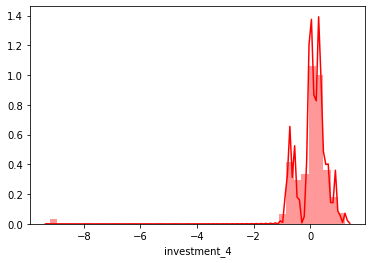

In [99]:
sns.distplot(cr_log['investment_4'], label = 'After_Scaling', kde =True,bins=40,color ='red')

In [100]:
test_data = pd.read_csv('Test.csv')

In [101]:
test_data.head()


,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17591,current,M,37,575,2795.45,1290.0,6141.05,676.50,9146.10,...,24.0,20.0,9750.0,30527.88,31271.00,3.0,12.0,25945.92,Y,1170.49
1,13541,current,M,33,394,29405.13,1640.0,1670.00,2463.92,10947.50,...,43.0,40.0,16967.0,14342.83,16582.00,6.0,39.0,12214.00,Y,16447.45
2,13431,current,M,53,324,5985.20,6189.0,2696.09,766.00,716.00,...,42.0,35.0,36398.0,32503.16,33539.54,5.0,9.0,13215.00,Y,2622.28
3,8687,current,M,33,370,2105.93,18225.0,34763.56,167.00,4260.27,...,3.0,5.0,97825.0,93572.42,109429.75,21.0,0.0,72317.00,Y,340.79
4,14727,current,M,62,505,3269.00,3532.0,3158.40,2699.77,3373.48,...,70.0,75.0,27936.0,19011.50,41401.00,6.0,35.0,42344.00,Y,2812.20


In [102]:
corr=df2.corr()
#sns.heatmap(data=corr,annot=True)
#df2=df2.drop(columns=df2[['personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed']])

In [103]:
S=pd.get_dummies(df1[['account_type', 'gender', 'loan_enq']]).astype('float64')
S

,account_type_current,account_type_saving,gender_F,gender_M,loan_enq_Y
0,1.0,0.0,0.0,1.0,1.0
2,1.0,0.0,0.0,1.0,1.0
3,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,1.0,1.0
5,1.0,0.0,0.0,1.0,1.0
6,1.0,0.0,0.0,1.0,1.0
7,1.0,0.0,0.0,1.0,1.0
8,1.0,0.0,1.0,0.0,1.0
9,1.0,0.0,0.0,1.0,1.0
10,0.0,1.0,0.0,1.0,1.0


In [104]:
df3=pd.concat([S,cr_log],axis=1).astype('float64')
df3.head()

,account_type_current,account_type_saving,gender_F,gender_M,loan_enq_Y,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,1.0,0.0,0.0,1.0,1.0,0.806445,-1.763965,0.171360,1.672912,0.787428,...,-0.722751,0.436299,-0.197876,-0.342515,-0.881361,-1.212874,0.731177,0.447297,-0.453510,0.127398
2,1.0,0.0,0.0,1.0,1.0,-0.455126,-0.253724,-1.195944,0.060401,1.114085,...,-0.722751,1.106107,-0.883081,0.248970,0.450980,-0.316773,-2.395912,-0.030214,1.182791,-0.005810
3,1.0,0.0,1.0,0.0,1.0,0.979573,-0.858360,0.339438,0.733156,0.849069,...,1.117501,0.388804,-0.751077,0.408892,0.382375,0.607441,0.946860,0.321350,-0.002125,-0.455912
4,1.0,0.0,0.0,1.0,1.0,-0.224390,0.458316,-0.536901,-0.503897,-0.939452,...,1.153627,0.643579,-0.176213,-1.316406,0.497913,-0.209165,0.111264,0.098299,0.769903,1.088422
5,1.0,0.0,0.0,1.0,1.0,-1.216146,-0.662065,0.719572,-0.996284,0.505989,...,1.653915,-2.047178,-0.310662,0.150974,1.184176,-1.212874,0.189082,-0.368537,0.208161,1.272399


In [105]:
X=df3.iloc[:,df3.columns!='cc_cons']
y=df3['cc_cons']
X.head()

,account_type_current,account_type_saving,gender_F,gender_M,loan_enq_Y,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
0,1.0,0.0,0.0,1.0,1.0,0.806445,-1.763965,0.171360,1.672912,0.787428,...,1.158847,-0.722751,0.436299,-0.197876,-0.342515,-0.881361,-1.212874,0.731177,0.447297,-0.453510
2,1.0,0.0,0.0,1.0,1.0,-0.455126,-0.253724,-1.195944,0.060401,1.114085,...,0.362987,-0.722751,1.106107,-0.883081,0.248970,0.450980,-0.316773,-2.395912,-0.030214,1.182791
3,1.0,0.0,1.0,0.0,1.0,0.979573,-0.858360,0.339438,0.733156,0.849069,...,0.267947,1.117501,0.388804,-0.751077,0.408892,0.382375,0.607441,0.946860,0.321350,-0.002125
4,1.0,0.0,0.0,1.0,1.0,-0.224390,0.458316,-0.536901,-0.503897,-0.939452,...,-0.318942,1.153627,0.643579,-0.176213,-1.316406,0.497913,-0.209165,0.111264,0.098299,0.769903
5,1.0,0.0,0.0,1.0,1.0,-1.216146,-0.662065,0.719572,-0.996284,0.505989,...,-0.668011,1.653915,-2.047178,-0.310662,0.150974,1.184176,-1.212874,0.189082,-0.368537,0.208161


In [106]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)
lasso=Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.9893833683022675


In [113]:
test_data=pd.read_csv('test.csv')

In [114]:
test_data.drop(['loan_enq','region_code','ID','age','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed'],axis=1)


,account_type,gender,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
0,current,M,2795.450,1290.00,6141.050,676.50,9146.100,15479.00,4.0,10.0,...,41755.00,24.0,20.0,9750.00,30527.88,31271.00,3.0,12.0,25945.92,1170.49
1,current,M,29405.130,1640.00,1670.000,2463.92,10947.500,956.00,3.0,10.0,...,130299.00,43.0,40.0,16967.00,14342.83,16582.00,6.0,39.0,12214.00,16447.45
2,current,M,5985.200,6189.00,2696.090,766.00,716.000,4133.22,7.0,30.0,...,40422.00,42.0,35.0,36398.00,32503.16,33539.54,5.0,9.0,13215.00,2622.28
3,current,M,2105.930,18225.00,34763.560,167.00,4260.270,20185.00,1.0,99.0,...,48148.00,3.0,5.0,97825.00,93572.42,109429.75,21.0,0.0,72317.00,340.79
4,current,M,3269.000,3532.00,3158.400,2699.77,3373.480,5120.00,2.0,10.0,...,25926.00,70.0,75.0,27936.00,19011.50,41401.00,6.0,35.0,42344.00,2812.20
5,saving,M,11495.510,2701.00,3957.240,1395.00,36608.500,2296.00,2.0,23.0,...,80813.00,2.0,8.0,27906.00,23978.50,32248.75,9.0,63.0,24986.00,291.16
6,current,M,3837.390,10809.00,126467.150,6204.00,3947.370,6288.00,5.0,11.0,...,45735.00,2.0,20.0,11388.00,14789.48,33319.00,5.0,32.0,45228.00,4786.40
7,current,M,22928.500,6331.49,9974.840,2699.00,4578.000,704.00,531.0,1.0,...,15929.00,3.0,20.0,69056.00,25376.75,81303.01,22.0,58.0,39930.00,8186.99
8,saving,M,2698.000,727.00,5264.500,5528.00,11310.500,627.44,26.0,9.0,...,36959.00,47.0,13.0,15700.00,22579.57,12317.00,6.0,12.0,63300.00,54632.60
9,current,M,6772.780,332.00,3343.560,8650.56,3672.500,4695.52,16.0,4.0,...,182908.00,47.0,11.0,77764.00,178334.88,111699.00,1.0,6.0,24559.00,3796.29


In [115]:
df_test_categorical=df_train.loc[:,df_train.dtypes==np.object]
df_test_numerical=df_train.loc[:,df_train.dtypes==np.number]


In [116]:

#df_test_numerical['investment_4'].describe()
df_test_numerical['investment_4']=df_test_numerical['investment_4'].add(12179)
cr_log1=df_test_numerical.applymap(lambda x: np.log(x+1))

C:\Users\Sufyan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [117]:
mm_scaler1 = StandardScaler()
cr_log1[cr_log1.columns] =mm_scaler1.fit_transform(cr_log1[cr_log1.columns])
cr_log1

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,0.806445,-1.763965,0.171360,1.672912,0.787428,0.981624,-1.208488,0.286589,-0.758202,1.363873,...,-0.722751,0.436299,-0.197876,-0.342515,-0.881361,-1.212874,0.731177,0.447297,-0.453510,0.127398
2,-0.455126,-0.253724,-1.195944,0.060401,1.114085,0.360982,0.803238,0.465002,1.241563,-0.523826,...,-0.722751,1.106107,-0.883081,0.248970,0.450980,-0.316773,-2.395912,-0.030214,1.182791,-0.005810
3,0.979573,-0.858360,0.339438,0.733156,0.849069,1.120268,0.956647,-2.027418,0.613156,-1.281666,...,1.117501,0.388804,-0.751077,0.408892,0.382375,0.607441,0.946860,0.321350,-0.002125,-0.455912
4,-0.224390,0.458316,-0.536901,-0.503897,-0.939452,0.578858,1.129329,0.798136,1.048555,1.459411,...,1.153627,0.643579,-0.176213,-1.316406,0.497913,-0.209165,0.111264,0.098299,0.769903,1.088422
5,-1.216146,-0.662065,0.719572,-0.996284,0.505989,-1.285805,-0.573790,-0.794887,0.758450,0.839737,...,1.653915,-2.047178,-0.310662,0.150974,1.184176,-1.212874,0.189082,-0.368537,0.208161,1.272399
6,-1.513170,0.212506,0.053666,-0.421120,0.031949,-0.789956,-0.235214,-1.666926,-1.300097,-1.281666,...,-0.722751,0.003726,-0.350116,-0.426276,1.185922,1.508718,-0.721872,-1.076285,-0.505725,1.188079
7,-0.441759,-0.504439,1.908435,-0.496933,0.046600,-0.764022,0.437421,-2.027418,0.758450,0.839737,...,-1.081577,0.859220,-1.443104,0.153003,-1.288157,-0.579604,0.630906,0.532518,0.853713,-0.475576
8,-2.216101,-0.348754,1.025408,0.352554,1.021378,-0.915547,1.363861,0.517316,1.069842,-1.281666,...,2.077366,1.094595,-0.106675,0.266015,-1.033091,-1.212874,0.903224,-0.606001,0.152574,-0.639003
9,1.377177,0.041042,-1.135981,-0.278508,0.760545,0.426997,-0.573790,-1.212759,1.100851,1.413021,...,0.862910,1.106107,-2.740138,1.663450,0.143361,-1.212874,0.703657,-0.316142,0.935930,-0.460689
10,1.646822,1.054575,0.843496,-0.018683,2.056992,-0.612861,0.820073,1.081267,0.758450,1.503337,...,-0.468160,0.200925,-0.572490,-0.185995,0.987508,1.240711,-0.793458,-0.201229,-1.494377,-0.013415


In [118]:
S1=pd.get_dummies(df_test_categorical[['account_type', 'gender']]).astype('float64')
S1

,account_type_current,account_type_saving,gender_F,gender_M
0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0
5,1.0,0.0,0.0,1.0
6,1.0,0.0,0.0,1.0
7,1.0,0.0,0.0,1.0
8,1.0,0.0,1.0,0.0
9,1.0,0.0,0.0,1.0
10,0.0,1.0,0.0,1.0


In [119]:
df_test=pd.concat([S1,cr_log1],axis=1).astype('float64')
df_test

,account_type_current,account_type_saving,gender_F,gender_M,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,1.0,0.0,0.0,1.0,0.806445,-1.763965,0.171360,1.672912,0.787428,0.981624,...,-0.722751,0.436299,-0.197876,-0.342515,-0.881361,-1.212874,0.731177,0.447297,-0.453510,0.127398
2,1.0,0.0,0.0,1.0,-0.455126,-0.253724,-1.195944,0.060401,1.114085,0.360982,...,-0.722751,1.106107,-0.883081,0.248970,0.450980,-0.316773,-2.395912,-0.030214,1.182791,-0.005810
3,1.0,0.0,1.0,0.0,0.979573,-0.858360,0.339438,0.733156,0.849069,1.120268,...,1.117501,0.388804,-0.751077,0.408892,0.382375,0.607441,0.946860,0.321350,-0.002125,-0.455912
4,1.0,0.0,0.0,1.0,-0.224390,0.458316,-0.536901,-0.503897,-0.939452,0.578858,...,1.153627,0.643579,-0.176213,-1.316406,0.497913,-0.209165,0.111264,0.098299,0.769903,1.088422
5,1.0,0.0,0.0,1.0,-1.216146,-0.662065,0.719572,-0.996284,0.505989,-1.285805,...,1.653915,-2.047178,-0.310662,0.150974,1.184176,-1.212874,0.189082,-0.368537,0.208161,1.272399
6,1.0,0.0,0.0,1.0,-1.513170,0.212506,0.053666,-0.421120,0.031949,-0.789956,...,-0.722751,0.003726,-0.350116,-0.426276,1.185922,1.508718,-0.721872,-1.076285,-0.505725,1.188079
7,1.0,0.0,0.0,1.0,-0.441759,-0.504439,1.908435,-0.496933,0.046600,-0.764022,...,-1.081577,0.859220,-1.443104,0.153003,-1.288157,-0.579604,0.630906,0.532518,0.853713,-0.475576
8,1.0,0.0,1.0,0.0,-2.216101,-0.348754,1.025408,0.352554,1.021378,-0.915547,...,2.077366,1.094595,-0.106675,0.266015,-1.033091,-1.212874,0.903224,-0.606001,0.152574,-0.639003
9,1.0,0.0,0.0,1.0,1.377177,0.041042,-1.135981,-0.278508,0.760545,0.426997,...,0.862910,1.106107,-2.740138,1.663450,0.143361,-1.212874,0.703657,-0.316142,0.935930,-0.460689
10,0.0,1.0,0.0,1.0,1.646822,1.054575,0.843496,-0.018683,2.056992,-0.612861,...,-0.468160,0.200925,-0.572490,-0.185995,0.987508,1.240711,-0.793458,-0.201229,-1.494377,-0.013415


In [120]:
lasso=Lasso(alpha=0.01)
lasso.fit(X,y)
y_pre=lasso.predict(df_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.9893833683022675


In [121]:
test_data

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17591,current,M,37,575,2795.450,1290.00,6141.050,676.50,9146.100,...,24.0,20.0,9750.00,30527.88,31271.00,3.0,12.0,25945.92,Y,1170.49
1,13541,current,M,33,394,29405.130,1640.00,1670.000,2463.92,10947.500,...,43.0,40.0,16967.00,14342.83,16582.00,6.0,39.0,12214.00,Y,16447.45
2,13431,current,M,53,324,5985.200,6189.00,2696.090,766.00,716.000,...,42.0,35.0,36398.00,32503.16,33539.54,5.0,9.0,13215.00,Y,2622.28
3,8687,current,M,33,370,2105.930,18225.00,34763.560,167.00,4260.270,...,3.0,5.0,97825.00,93572.42,109429.75,21.0,0.0,72317.00,Y,340.79
4,14727,current,M,62,505,3269.000,3532.00,3158.400,2699.77,3373.480,...,70.0,75.0,27936.00,19011.50,41401.00,6.0,35.0,42344.00,Y,2812.20
5,14988,saving,M,30,454,11495.510,2701.00,3957.240,1395.00,36608.500,...,2.0,8.0,27906.00,23978.50,32248.75,9.0,63.0,24986.00,Y,291.16
6,14859,current,M,33,796,3837.390,10809.00,126467.150,6204.00,3947.370,...,2.0,20.0,11388.00,14789.48,33319.00,5.0,32.0,45228.00,Y,4786.40
7,16636,current,M,223,575,22928.500,6331.49,9974.840,2699.00,4578.000,...,3.0,20.0,69056.00,25376.75,81303.01,22.0,58.0,39930.00,Y,8186.99
8,7625,saving,M,37,623,2698.000,727.00,5264.500,5528.00,11310.500,...,47.0,13.0,15700.00,22579.57,12317.00,6.0,12.0,63300.00,Y,54632.60
9,16492,current,M,34,123,6772.780,332.00,3343.560,8650.56,3672.500,...,47.0,11.0,77764.00,178334.88,111699.00,1.0,6.0,24559.00,Y,3796.29


In [122]:
df_test_categorical=test_data.loc[:,test_data.dtypes==np.object]
df_test_categorical

,account_type,gender,loan_enq
0,current,M,Y
1,current,M,Y
2,current,M,Y
3,current,M,Y
4,current,M,Y
5,saving,M,Y
6,current,M,Y
7,current,M,Y
8,saving,M,Y
9,current,M,Y


In [52]:
df_test_numerical=test_data.loc[:,test_data.dtypes==np.number]
df_test_numerical

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
0,2795.450,1290.00,6141.050,676.50,9146.100,15479.00,4.0,10.0,4.0,47.0,...,41755.00,24.0,20.0,9750.00,30527.88,31271.00,3.0,12.0,25945.92,1170.49
1,29405.130,1640.00,1670.000,2463.92,10947.500,956.00,3.0,10.0,4.0,50.0,...,130299.00,43.0,40.0,16967.00,14342.83,16582.00,6.0,39.0,12214.00,16447.45
2,5985.200,6189.00,2696.090,766.00,716.000,4133.22,7.0,30.0,5.0,24.0,...,40422.00,42.0,35.0,36398.00,32503.16,33539.54,5.0,9.0,13215.00,2622.28
3,2105.930,18225.00,34763.560,167.00,4260.270,20185.00,1.0,99.0,71.0,5.0,...,48148.00,3.0,5.0,97825.00,93572.42,109429.75,21.0,0.0,72317.00,340.79
4,3269.000,3532.00,3158.400,2699.77,3373.480,5120.00,2.0,10.0,47.0,5.0,...,25926.00,70.0,75.0,27936.00,19011.50,41401.00,6.0,35.0,42344.00,2812.20
5,11495.510,2701.00,3957.240,1395.00,36608.500,2296.00,2.0,23.0,35.0,21.0,...,80813.00,2.0,8.0,27906.00,23978.50,32248.75,9.0,63.0,24986.00,291.16
6,3837.390,10809.00,126467.150,6204.00,3947.370,6288.00,5.0,11.0,50.0,21.0,...,45735.00,2.0,20.0,11388.00,14789.48,33319.00,5.0,32.0,45228.00,4786.40
7,22928.500,6331.49,9974.840,2699.00,4578.000,704.00,531.0,1.0,74.0,7.0,...,15929.00,3.0,20.0,69056.00,25376.75,81303.01,22.0,58.0,39930.00,8186.99
8,2698.000,727.00,5264.500,5528.00,11310.500,627.44,26.0,9.0,9.0,1.0,...,36959.00,47.0,13.0,15700.00,22579.57,12317.00,6.0,12.0,63300.00,54632.60
9,6772.780,332.00,3343.560,8650.56,3672.500,4695.52,16.0,4.0,4.0,1.0,...,182908.00,47.0,11.0,77764.00,178334.88,111699.00,1.0,6.0,24559.00,3796.29


In [56]:
 #for i in df_test_numerical.columns() :
q1=df_test_numerical[i].quantile(0.25)
q3=df_test_numerical[i].quantile(0.75)
iqr=q3-q1
ll=q1-(3*iqr)
ul=q3+(3*iqr)
        
for a in df_test_numerical.columns:
    if a in ll.index:
        num.append(a)
df_test_numerical=df_test_numerical[num]
df = df2[~((df2 < (q1 - 1.5 * iqr)) |(df2 > (q3 + 1.5 * iqr))).any(axis=1)]

NameError: name 'i' is not defined

In [54]:
def rmsle(y, y_pre):
    sum=0.0
    for x,y in zip(y,y_pred):
        if x<0 or y<0: #check for negative values. 
            continue
        p = np.log(y+1)
        r = np.log(x+1)
        sum = sum + (p - r)**2
    return (sum/len(y_pred))**0.5

In [55]:
rmsle(y,y_pre)

NameError: name 'y_pred' is not defined

In [577]:
y_pre

array([10.28038545, 10.25696494, 10.29090203, ..., 10.25704529,
       10.24511058, 10.27685886])

In [590]:
15000-14015

985

In [591]:
985/15000

0.06566666666666666